<a href="https://colab.research.google.com/github/Sahith-03/Student-Leave-Prediction/blob/main/Leave_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: Forecasting a student's likelihood of taking a leave based on factors such as proximity to festivals, extended weekends, and the distance between the university and their home


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

url = 'https://raw.githubusercontent.com/Sahith-03/Student-Leave-Prediction/main/data.csv?token=GHSAT0AAAAAACLKC55466ZEZH4RQZCNWWKIZMZVOGQ'
data = pd.read_csv(url)
data.head()

,Student ID,Date,Nearby Festivals,Long Weekends,Distance to University,Takes Leave,branch
0,ME21B1002,2023-02-12,No,Yes,150.0,No,ME
1,EC21B1015,2023-02-12,No,No,150.0,No,EC
2,ME21B1005,2023-02-19,No,Yes,600.0,Yes,ME
3,EC21B1018,2023-02-19,Yes,No,1200.0,Yes,EC
4,ME21B1004,2023-02-26,No,Yes,50.0,No,ME


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              91 non-null     object 
 1   Date                    91 non-null     object 
 2   Nearby Festivals        91 non-null     object 
 3   Long Weekends           90 non-null     object 
 4   Distance to University  90 non-null     float64
 5   Takes Leave             91 non-null     object 
 6   branch                  91 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.1+ KB


In [ ]:
data.describe()

,Distance to University
count,90.000000
mean,590.444444
std,630.720849
min,10.000000
25%,90.000000
50%,180.000000
75%,1075.000000
max,1900.000000


Dropping unnecessary columns

In [ ]:

data = data.drop(['branch','Student ID','Date'],axis=1)
data

,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,No,Yes,150.0,No
1,No,No,150.0,No
2,No,Yes,600.0,Yes
3,Yes,No,1200.0,Yes
4,No,Yes,50.0,No
...,...,...,...,...
86,Yes,No,120.0,Yes
87,No,Yes,1900.0,No
88,No,Yes,160.0,No
89,Yes,No,700.0,Yes


Correcting irrelevant Data(Negative in this case) by taking its modulus

In [ ]:
for i in range(len(data)):
    if data['Distance to University'][i]<0:
        data['Distance to University'][i] *= -1

data

,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,No,Yes,150.0,No
1,No,No,150.0,No
2,No,Yes,600.0,Yes
3,Yes,No,1200.0,Yes
4,No,Yes,50.0,No
...,...,...,...,...
86,Yes,No,120.0,Yes
87,No,Yes,1900.0,No
88,No,Yes,160.0,No
89,Yes,No,700.0,Yes


Dropping rows which have null values

In [ ]:
print(data.isnull().sum())
data = data.dropna(axis=0)
data

Nearby Festivals          0
Long Weekends             1
Distance to University    1
Takes Leave               0
dtype: int64


,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,No,Yes,150.0,No
1,No,No,150.0,No
2,No,Yes,600.0,Yes
3,Yes,No,1200.0,Yes
4,No,Yes,50.0,No
...,...,...,...,...
86,Yes,No,120.0,Yes
87,No,Yes,1900.0,No
88,No,Yes,160.0,No
89,Yes,No,700.0,Yes


In [ ]:
print(data.isnull().sum())
data = data.dropna(axis=0)
data

Nearby Festivals          0
Long Weekends             0
Distance to University    0
Takes Leave               0
dtype: int64


,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,No,Yes,150.0,No
1,No,No,150.0,No
2,No,Yes,600.0,Yes
3,Yes,No,1200.0,Yes
4,No,Yes,50.0,No
...,...,...,...,...
86,Yes,No,120.0,Yes
87,No,Yes,1900.0,No
88,No,Yes,160.0,No
89,Yes,No,700.0,Yes


Removing Duplicated rows in dataset

In [ ]:
data = data.drop_duplicates()
data

,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,No,Yes,150.0,No
1,No,No,150.0,No
2,No,Yes,600.0,Yes
3,Yes,No,1200.0,Yes
4,No,Yes,50.0,No
5,Yes,No,1800.0,No
6,Yes,No,90.0,Yes
7,No,Yes,130.0,No
8,Yes,No,350.0,Yes
9,No,Yes,1400.0,No


Data Visualization

<Axes: >

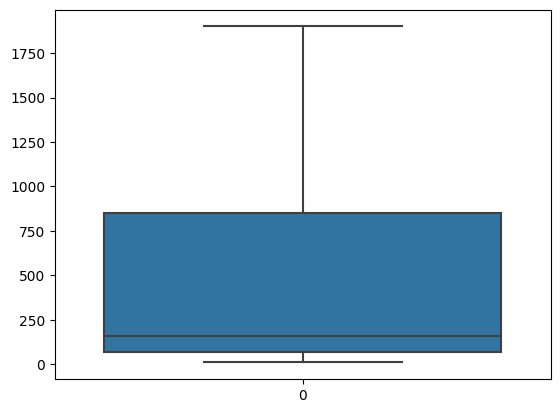

In [ ]:
sns.boxplot(data['Distance to University'])

Data Normalization

In [ ]:
le = LabelEncoder()

data['Nearby Festivals'] = le.fit_transform(data['Nearby Festivals'])
data['Long Weekends'] = le.fit_transform(data['Long Weekends'])
data['Takes Leave'] = le.fit_transform(data['Takes Leave'])

data

<ipython-input-11-e214ce921067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nearby Festivals'] = le.fit_transform(data['Nearby Festivals'])
<ipython-input-11-e214ce921067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long Weekends'] = le.fit_transform(data['Long Weekends'])
<ipython-input-11-e214ce921067>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,0,1,150.0,0
1,0,0,150.0,0
2,0,1,600.0,1
3,1,0,1200.0,1
4,0,1,50.0,0
5,1,0,1800.0,0
6,1,0,90.0,1
7,0,1,130.0,0
8,1,0,350.0,1
9,0,1,1400.0,0


In [ ]:
scale = StandardScaler()
# data['Distamc'] = scale.fit_transform(data)
data['Distance to University'] = scale.fit_transform(data[['Distance to University']])
data = pd.DataFrame(data)
data

<ipython-input-12-23b7868aa970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance to University'] = scale.fit_transform(data[['Distance to University']])


,Nearby Festivals,Long Weekends,Distance to University,Takes Leave
0,0,1,-0.582373,0
1,0,0,-0.582373,0
2,0,1,0.151667,1
3,1,0,1.130387,1
4,0,1,-0.745493,0
5,1,0,2.109106,0
6,1,0,-0.680245,1
7,0,1,-0.614997,0
8,1,0,-0.256133,1
9,0,1,1.456626,0


Data Modelling

In [ ]:
#Splitting the data for training and testing
X = data.iloc[:,0:3 ]
Y = data.iloc[:, 3]
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=42,test_size=0.2)

In [ ]:
#Creating object for performing KNN algorithm
nn = KNeighborsClassifier(n_neighbors=5,p=2)
X_train

,Nearby Festivals,Long Weekends,Distance to University
8,1,0,-0.256133
3,1,0,1.130387
6,1,0,-0.680245
60,1,0,-0.549749
43,0,1,-0.745493
13,0,1,-0.696557
17,0,1,1.945986
77,1,0,0.314787
15,1,0,-0.631309
9,0,1,1.456626


In [ ]:
#Training Model
nn.fit(X_train,y_train)
y_predict = nn.predict(X_test)
print(y_predict)

[0 0 1 0 1 0 1 1 1 1]


In [ ]:
correct = 0
# for i in range(len(y_predict)):
    # if int(y_predict[i])==int(y_test[i]):
    #     correct+=1
print(f"{type(y_predict[1])}{type(y_test)}")
# accuracy = correct/len(y_predict) * 100
# print(accuracy)

<class 'numpy.int64'><class 'pandas.core.series.Series'>


In [ ]:
#Checking Accuracy
print(accuracy_score(y_predict,y_test))

0.6


In [ ]:
# Test outputs
print(y_test)

30    0
58    0
28    1
70    1
24    1
47    0
12    0
19    0
4     0
25    1
Name: Takes Leave, dtype: int64
